In [1]:
!pip install pandas seaborn matplotlib;

In [2]:
#!jupyter labextension install @krassowski/jupyterlab_go_to_definition;

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

# Probleme
## Problemtypen
*'Minority applicability'*. The cashflow techniques are only applicable to a very limited number of markets (where growth is relatively high, and a definite pattern of product life-cycles can be observed, such as that of ethical pharmaceuticals). In the majority of markets, use may give misleading results.
    
    
*'Milking cash cows'*. Perhaps the worst implication of the later developments is that the (brand leader) cash cows should be milked to fund new brands. This is not what research into the fast-moving consumer goods markets has shown to be the case. The brand leader's position is the one, above all, to be defended, not least since brands in this position will probably outperform any number of newly launched brands. Such brand leaders will, of course, generate large cash flows; but they should not be 'milked' to such an extent that their position is jeopardized. In any case, the chance of the new brands achieving similar brand leadership may be slim—certainly far less than the popular perception of the Boston Matrix would imply.
    
## Alternative
 Betrachtung der GEMatrix

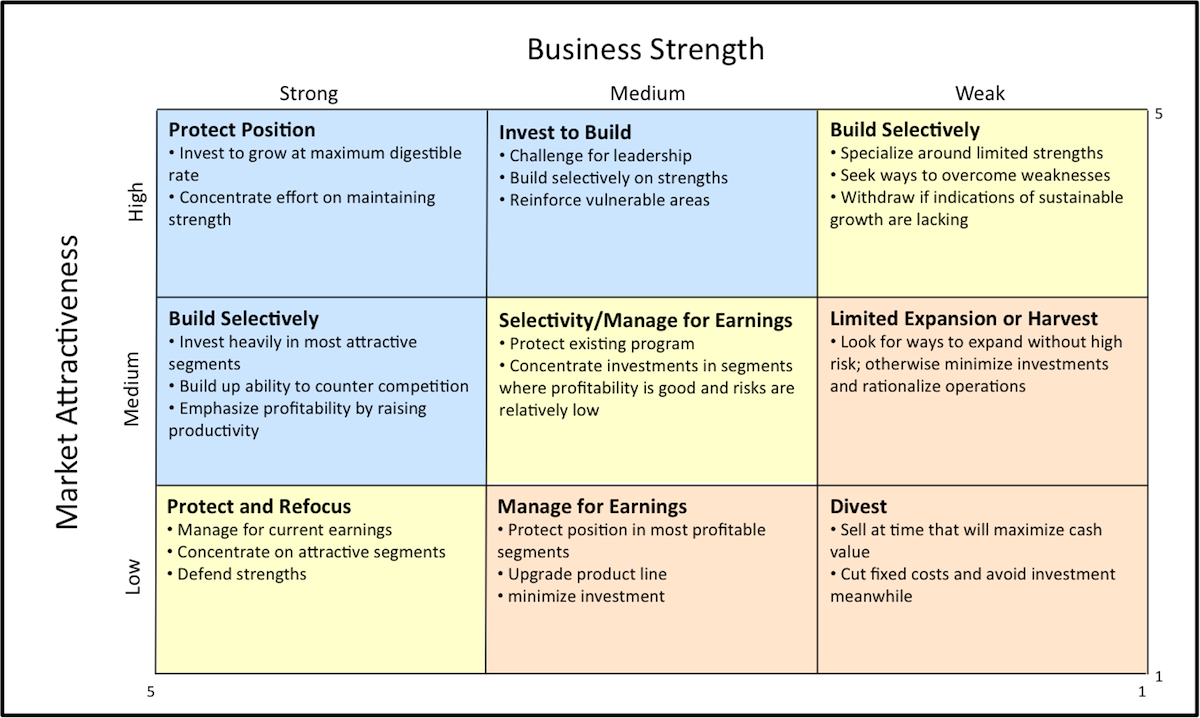

In [4]:
from IPython.display import Image
Image(filename='./GE-McKinsey Matrix.png') 

# Datenalayse
Datenquelle: 
    https://www.goodcarbadcar.net/2021-us-vehicle-sales-figures-by-brand/


In [5]:
df_raw= pd.read_csv("us car sales by brands.csv")

## Bereinigung

Maserati, Bentley und Smart werden entfernt, da sie aktuell am US Markt nicht teilnehmen.          
Q1 2021 wird entfernt da es unvollständig ist.          
Zahlen werden von einem Textstring in einen Zahldatentypen überführt.          
Die Markennamen werden als Index der Tabelle verwendet.          

In [6]:
df_verkaufszahlen=df_raw[df_raw['Brand'].map(lambda x : x not in ["Smart", "Bentley", "Maserati"])]
df_verkaufszahlen = df_verkaufszahlen.drop(columns=["Q1 2021"])
df_verkaufszahlen[df_verkaufszahlen.columns.difference(["Brand"])] = df_verkaufszahlen[df_verkaufszahlen.columns.difference(["Brand"])].apply(pd.to_numeric)
df_verkaufszahlen.set_index(["Brand"],inplace=True)
df_verkaufszahlen

Q2 2018  Q3 2018  Q4 2018  Q1 2019  Q2 2019  Q3 2019  Q4 2019  \
Brand                                                                          
Acura            39239    41830    44451    36385    37382    39046    44572   
Alfa Romeo        6473     5895     5640     4286     4751     4310     4947   
Audi             57890    59478    55903    48115    53325    57031    65640   
BMW              79551    71679    85949    73888    82551    75987    92399   
Buick            52770    45907    51742    51865    55373    50614    49074   
Cadillac         39219    37290    41465    35996    39739    39962    40553   
Chevrolet       511719   483877   530690   451742   486884   505913   497500   
Chrysler         42397    38526    38808    31591    32831    29544    33006   
Dodge           133962   108795    99596   110517   117582   104146    90643   
Fiat              4271     3799     3437     2214     2889     2361     1740   
Ford            651366   581928   578262   557884   613098   548070   565373   
Genesis           2900     1647     1031     4203     5805     4902     6327   
GMC             138165   126417   160525   125579   151701   140790   146880   
Honda           386094   377346   353380   333402   370026   390168   357389   
Hyundai         183271   165006   186336   147585   185743   173028   182415   
Infiniti         31283    33079    44031    34315    28743    24876    29774   
Jaguar            6738     6389     9307    10222     6060     6150     8573   
Jeep            266917   251172   227033   212804   243477   245474   221537   
Kia             166618   158479   137631   136596   168248   158754   151015   
Land Rover       20533    20354    27010    25028    21095    20516    28097   
Lexus            70783    78622    84686    66791    68944    73816    88561   
Lincoln          27807    25011    28307    24874    25941    27937    33355   
Mazda            79929    71198    65203    70831    67722    69612    70385   
Mercedes-Benz    86283    77656    98485    78667    80463    89636   103363   
Mini             12103    11557     9491     8905     8678    10243     8339   
Mitsubishi       31555    26071    24676    42070    29030    24474    25475   
Nissan          333409   310908   325164   331536   322442   302478   271517   
Porsche          15496    13205    14576    15024    15233    14805    16506   
Ram             146687   156320   180707   137013   196155   179200   190655   
Subaru          173157   180558   176717   156754   182771   185804   174788   
Tesla            28462    68350    77525    30600    53300    54700    56525   
Toyota          546487   556301   517746   476925   539448   553378   515455   
Volkswagen       88935    93330    87836    85872    98736    93547    85167   
Volvo            27539    26307    24634    22058    28062    27305    30802   

               Q1 2020  Q2 2020  Q3 2020  Q4 2020  
Brand                                              
Acura            28531    27458    39664    41329  
Alfa Romeo        3702     3735     5056     6092  
Audi             41371    34839    47896    62519  
BMW              62152    50956    68439    98750  
Buick            33870    35521    49170    44188  
Cadillac         30323    23297    32966    42909  
Chevrolet       429529   330381   449134   520989  
Chrysler         29945    13857    31869    34614  
Dodge            88656    43756    71935    62979  
Fiat              1128     1339     1102      735  
Ford            489051   411035   521530   507579  
Genesis           3955     3585     3745     5099  
GMC             118718   101759   132746   162090  
Honda           270253   266044   338769   324739  
Hyundai         130875   139378   170828   178844  
Infiniti         25556    16097    17368    20482  
Jaguar            7266     4320     4700     5500  
Jeep            182667   176713   222211   213715  
Kia             137945   125302   165013   157745  
Land Rover       21936    14500    15899  

Die Tabelle wird transponiert, damit werden die Marken von Zeilen zu Spalten.          
Es wird die Summe der Verkaufe pro Quartal berechnet.         
Es wird der jeweilige Maximalwert der Verkäufe pro Quartal berechnet. Hierbei darf die bereits gebildete Summe nicht mit einbezogen werden.
Im Anschluss ist die bereinigte Tabelle angegeben und der Bereinigungsabschnitt beendet.

In [7]:
df_verkaufszahlen=df_verkaufszahlen.T
df_verkaufszahlen["Summe"] = df_verkaufszahlen.sum(numeric_only=True,axis=1)
df_verkaufszahlen["Max"] = df_verkaufszahlen.drop("Summe", axis=1).max(numeric_only=True,axis=1)
df_verkaufszahlen["75%Quantil"] = df_verkaufszahlen.drop(["Summe","Max"], axis=1).quantile(q=0.75, numeric_only=True,axis=1)
df_verkaufszahlen["Median"] = df_verkaufszahlen.drop(["Summe","Max","75%Quantil"], axis=1).median(numeric_only=True,axis=1)
df_verkaufszahlen["25%Quantil"] = df_verkaufszahlen.drop(["Summe","Max","75%Quantil","Median"], axis=1).quantile(q=0.25, numeric_only=True,axis=1)
df_verkaufszahlen["Min"] = df_verkaufszahlen.drop(["Summe","Max","75%Quantil","Median","75%Quantil"], axis=1).min(numeric_only=True,axis=1)
df_verkaufszahlen.T

Q2 2018     Q3 2018     Q4 2018     Q1 2019     Q2 2019  \
Brand                                                                       
Acura            39239.00    41830.00    44451.00    36385.00    37382.00   
Alfa Romeo        6473.00     5895.00     5640.00     4286.00     4751.00   
Audi             57890.00    59478.00    55903.00    48115.00    53325.00   
BMW              79551.00    71679.00    85949.00    73888.00    82551.00   
Buick            52770.00    45907.00    51742.00    51865.00    55373.00   
Cadillac         39219.00    37290.00    41465.00    35996.00    39739.00   
Chevrolet       511719.00   483877.00   530690.00   451742.00   486884.00   
Chrysler         42397.00    38526.00    38808.00    31591.00    32831.00   
Dodge           133962.00   108795.00    99596.00   110517.00   117582.00   
Fiat              4271.00     3799.00     3437.00     2214.00     2889.00   
Ford            651366.00   581928.00   578262.00   557884.00   613098.00   
Genesis           2900.00     1647.00     1031.00     4203.00     5805.00   
GMC             138165.00   126417.00   160525.00   125579.00   151701.00   
Honda           386094.00   377346.00   353380.00   333402.00   370026.00   
Hyundai         183271.00   165006.00   186336.00   147585.00   185743.00   
Infiniti         31283.00    33079.00    44031.00    34315.00    28743.00   
Jaguar            6738.00     6389.00     9307.00    10222.00     6060.00   
Jeep            266917.00   251172.00   227033.00   212804.00   243477.00   
Kia             166618.00   158479.00   137631.00   136596.00   168248.00   
Land Rover       20533.00    20354.00    27010.00    25028.00    21095.00   
Lexus            70783.00    78622.00    84686.00    66791.00    68944.00   
Lincoln          27807.00    25011.00    28307.00    24874.00    25941.00   
Mazda            79929.00    71198.00    65203.00    70831.00    67722.00   
Mercedes-Benz    86283.00    77656.00    98485.00    78667.00    80463.00   
Mini             12103.00    11557.00     9491.00     8905.00     8678.00   
Mitsubishi       31555.00    26071.00    24676.00    42070.00    29030.00   
Nissan          333409.00   310908.00   325164.00   331536.00   322442.00   
Porsche          15496.00    13205.00    14576.00    15024.00    15233.00   
Ram             146687.00   156320.00   180707.00   137013.00   196155.00   
Subaru          173157.00   180558.00   176717.00   156754.00   182771.00   
Tesla            28462.00    68350.00    77525.00    30600.00    53300.00   
Toyota          546487.00   556301.00   517746.00   476925.00   539448.00   
Volkswagen       88935.00    93330.00    87836.00    85872.00    98736.00   
Volvo            27539.00    26307.00    24634.00    22058.00    28062.00   
Summe          4490008.00  4314287.00  4397980.00  3982137.00  4424228.00   
Max             651366.00   581928.00   578262.00   557884.00   613098.00   
75%Quantil      161635.25   157939.25   172669.00   136908.75   179140.25   
Median           64336.50    69774.00    71364.00    59328.00    61547.50   
25%Quantil       27970.75    26130.00    27334.25    26421.00    28232.25   
Min               2900.00     1647.00     1031.00     2214.00     2889.00   

                  Q3 2019     Q4 2019    Q1 2020     Q2 2020     Q3 2020  \
Brand                                                                      
Acura            39046.00    44572.00    28531.0    27458.00    39664.00   
Alfa Romeo        4310.00     4947.00     3702.0     3735.00     5056.00   
Audi             57031.00    65640.00    41371.0    34839.00    47896.00   
BMW              75987.00    92399.00    62152.0    50956.00    68439.00   
Buick            50614.00    49074.00    33870.0    35521.00    49170.00   
Cadillac         39962.00    40553.00    30323.0    23297.00    32966.00   
Chevrolet       505913.00   497500.00   429529.0   330381.00   449134.00   
Chrysler         29544.00    33006.00    29945.0    13857.00    31869.00   
Dodge           104146.

# Deskriptive Datenanalyse


## Marktentwicklung

In [8]:
df_delta_verkaufszahlen = df_verkaufszahlen.diff(periods=1,axis=0)
print("Verkaufszahlen")
print(df_verkaufszahlen["Summe"])
print("\n\nÄnderung Verkaufszahlen")
print(df_delta_verkaufszahlen["Summe"])
print("\n\nRelative Änderung Verkaufszahlen")
print(df_delta_verkaufszahlen["Summe"]/df_verkaufszahlen["Summe"])

print("\n\nIm Q4 2020 konnten im Vergleich zu Q4 2018 insgesamt "
      + f'{df_verkaufszahlen["Summe"]["Q4 2018"]-df_verkaufszahlen["Summe"]["Q4 2020"]}'
      + " weniger Automobile im US Markt abgesetzt werden.")

Verkaufszahlen
Q2 2018    4490008
Q3 2018    4314287
Q4 2018    4397980
Q1 2019    3982137
Q2 2019    4424228
Q3 2019    4328577
Q4 2019    4288347
Q1 2020    3504931
Q2 2020    2959584
Q3 2020    4004999
Q4 2020    4196273
Name: Summe, dtype: int64


Änderung Verkaufszahlen
Q2 2018          NaN
Q3 2018    -175721.0
Q4 2018      83693.0
Q1 2019    -415843.0
Q2 2019     442091.0
Q3 2019     -95651.0
Q4 2019     -40230.0
Q1 2020    -783416.0
Q2 2020    -545347.0
Q3 2020    1045415.0
Q4 2020     191274.0
Name: Summe, dtype: float64


Relative Änderung Verkaufszahlen
Q2 2018         NaN
Q3 2018   -0.040730
Q4 2018    0.019030
Q1 2019   -0.104427
Q2 2019    0.099925
Q3 2019   -0.022098
Q4 2019   -0.009381
Q1 2020   -0.223518
Q2 2020   -0.184265
Q3 2020    0.261028
Q4 2020    0.045582
Name: Summe, dtype: float64


Im Q4 2020 konnten im Vergleich zu Q4 2018 insgesamt 201707 weniger Automobile im US Markt abgesetzt werden.


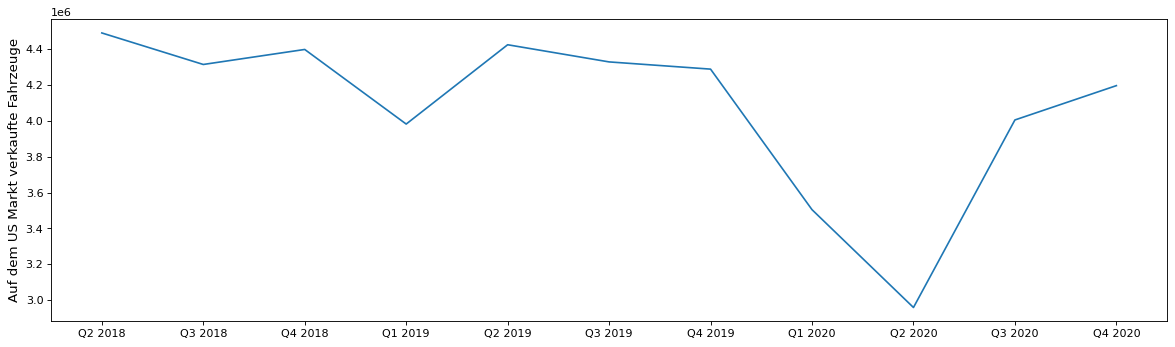

In [9]:
figure(num=None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=df_verkaufszahlen["Summe"])
plt.ylabel("Auf dem US Markt verkaufte Fahrzeuge", fontsize=12)
plt.show()

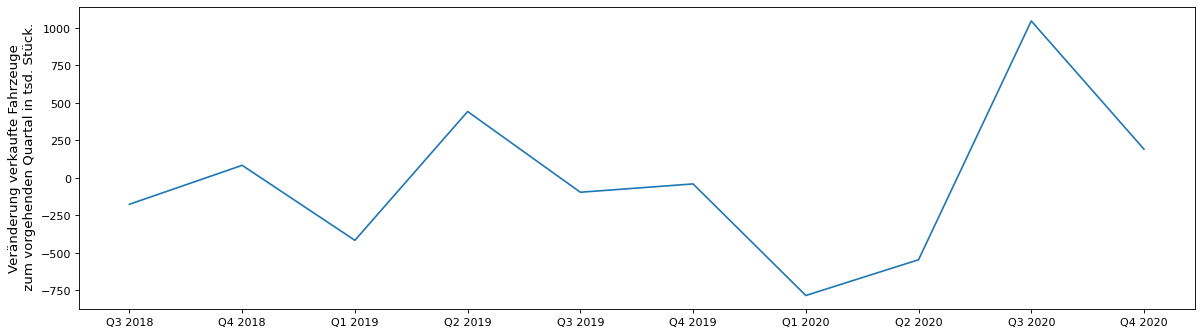

In [10]:
figure(num=None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=df_delta_verkaufszahlen["Summe"]/1000)
plt.ylabel("Veränderung verkaufte Fahrzeuge\n zum vorgehenden Quartal in tsd. Stück.", fontsize=12)
plt.show()

## Übersicht GM Marken
Relevante Marken von GM sind:"Chevrolet","Buick","GMC","Cadillac".

In [11]:
relevante_marken=  ["Chevrolet","Buick","GMC","Cadillac"]
meta_information= ["Summe","Max","25%Quantil","Median","75%Quantil","Min"]

In [12]:
df_verkaufszahlen[relevante_marken+meta_information].describe()

Brand      Chevrolet         Buick            GMC      Cadillac         Summe  \
count      11.000000     11.000000      11.000000     11.000000  1.100000e+01   
mean   472578.000000  47281.272727  136851.818182  36701.727273  4.081032e+06   
std     56898.390077   6957.170877   18299.843075   5808.760782  4.650319e+05   
min    330381.000000  33870.000000  101759.000000  23297.000000  2.959584e+06   
25%    450438.000000  45047.500000  125998.000000  34481.000000  3.993568e+06   
50%    486884.000000  49170.000000  138165.000000  39219.000000  4.288347e+06   
75%    508816.000000  51803.500000  149290.500000  40257.500000  4.363278e+06   
max    530690.000000  55373.000000  162090.000000  42909.000000  4.490008e+06   

Brand            Max    25%Quantil        Median     75%Quantil          Min  
count      11.000000     11.000000     11.000000      11.000000    11.000000  
mean   553696.909091  26010.568182  62382.909091  158625.863636  1735.090909  
std     63550.111093   3967.064683   8907.684600   18342.654705   757.601274  
min    411035.000000  14899.250000  40278.000000  127087.000000   735.000000  
25%    537454.000000  25544.500000  60437.750000  147424.000000  1115.000000  
50%    565373.000000  26421.000000  63490.500000  168337.750000  1647.000000  
75%    580095.000000  28101.500000  68893.250000  170759.250000  2287.500000  
max    651366.000000  30031.000000  71364.000000  179140.250000  2900.000000

In [13]:
df_verkaufszahlen[relevante_marken+meta_information].T

Q2 2018     Q3 2018     Q4 2018     Q1 2019     Q2 2019  \
Brand                                                                    
Chevrolet    511719.00   483877.00   530690.00   451742.00   486884.00   
Buick         52770.00    45907.00    51742.00    51865.00    55373.00   
GMC          138165.00   126417.00   160525.00   125579.00   151701.00   
Cadillac      39219.00    37290.00    41465.00    35996.00    39739.00   
Summe       4490008.00  4314287.00  4397980.00  3982137.00  4424228.00   
Max          651366.00   581928.00   578262.00   557884.00   613098.00   
25%Quantil    27970.75    26130.00    27334.25    26421.00    28232.25   
Median        64336.50    69774.00    71364.00    59328.00    61547.50   
75%Quantil   161635.25   157939.25   172669.00   136908.75   179140.25   
Min            2900.00     1647.00     1031.00     2214.00     2889.00   

               Q3 2019     Q4 2019    Q1 2020     Q2 2020     Q3 2020  \
Brand                                                                   
Chevrolet    505913.00   497500.00   429529.0   330381.00   449134.00   
Buick         50614.00    49074.00    33870.0    35521.00    49170.00   
GMC          140790.00   146880.00   118718.0   101759.00   132746.00   
Cadillac      39962.00    40553.00    30323.0    23297.00    32966.00   
Summe       4328577.00  4288347.00  3504931.0  2959584.00  4004999.00   
Max          553378.00   565373.00   489051.0   411035.00   521530.00   
25%Quantil    25483.25    30031.00    25557.5    14899.25    25531.50   
Median        63321.50    68012.50    54572.5    40278.00    70187.00   
75%Quantil   169459.50   168844.75   130804.0   127087.00   168337.75   
Min            2361.00     1740.00     1128.0     1339.00     1102.00   

              Q4 2020  
Brand                  
Chevrolet    520989.0  
Buick         44188.0  
GMC          162090.0  
Cadillac      42909.0  
Summe       4196273.0  
Max          567761.0  
25%Quantil    28525.5  
Median        63490.5  
75%Quantil   172059.0  
Min             735.0

## Verkaufszahlen im Quartal nach Marke

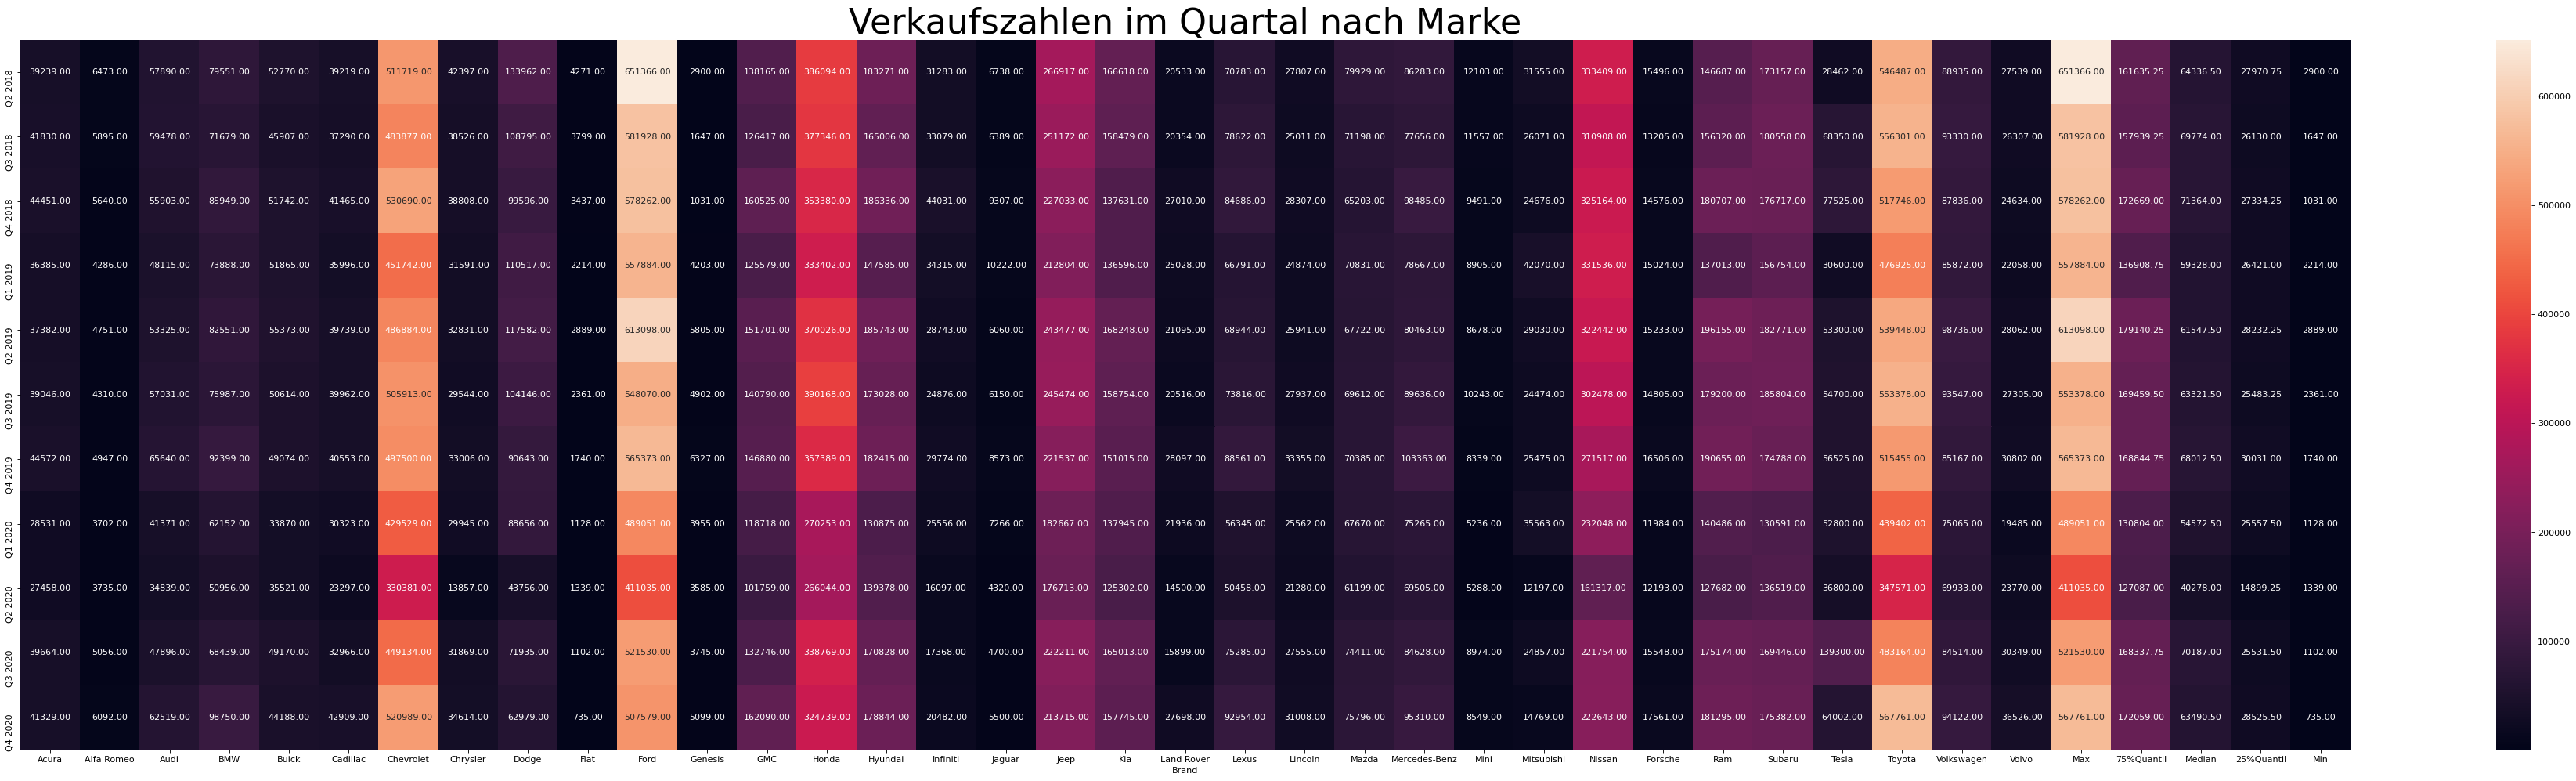

In [14]:
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(df_verkaufszahlen.drop(["Summe"],axis=1), annot=True, fmt=".2f")
plt.title('Verkaufszahlen im Quartal nach Marke', fontsize=40)
plt.show()

In [15]:
vk_relevant = df_verkaufszahlen[relevante_marken+ ["Max","Median","25%Quantil"]]

In [16]:
df_verkaufszahlen[relevante_marken+ ["25%Quantil","Median","75%Quantil","Max",]]

Brand    Chevrolet  Buick     GMC  Cadillac  25%Quantil   Median  75%Quantil  \
Q2 2018     511719  52770  138165     39219    27970.75  64336.5   161635.25   
Q3 2018     483877  45907  126417     37290    26130.00  69774.0   157939.25   
Q4 2018     530690  51742  160525     41465    27334.25  71364.0   172669.00   
Q1 2019     451742  51865  125579     35996    26421.00  59328.0   136908.75   
Q2 2019     486884  55373  151701     39739    28232.25  61547.5   179140.25   
Q3 2019     505913  50614  140790     39962    25483.25  63321.5   169459.50   
Q4 2019     497500  49074  146880     40553    30031.00  68012.5   168844.75   
Q1 2020     429529  33870  118718     30323    25557.50  54572.5   130804.00   
Q2 2020     330381  35521  101759     23297    14899.25  40278.0   127087.00   
Q3 2020     449134  49170  132746     32966    25531.50  70187.0   168337.75   
Q4 2020     520989  44188  162090     42909    28525.50  63490.5   172059.00   

Brand       Max  
Q2 2018  651366  
Q3 2018  581928  
Q4 2018  578262  
Q1 2019  557884  
Q2 2019  613098  
Q3 2019  553378  
Q4 2019  565373  
Q1 2020  489051  
Q2 2020  411035  
Q3 2020  521530  
Q4 2020  567761

Text(0, 0.5, 'Verkaufte Fahrzeuge in tsd. Stück')

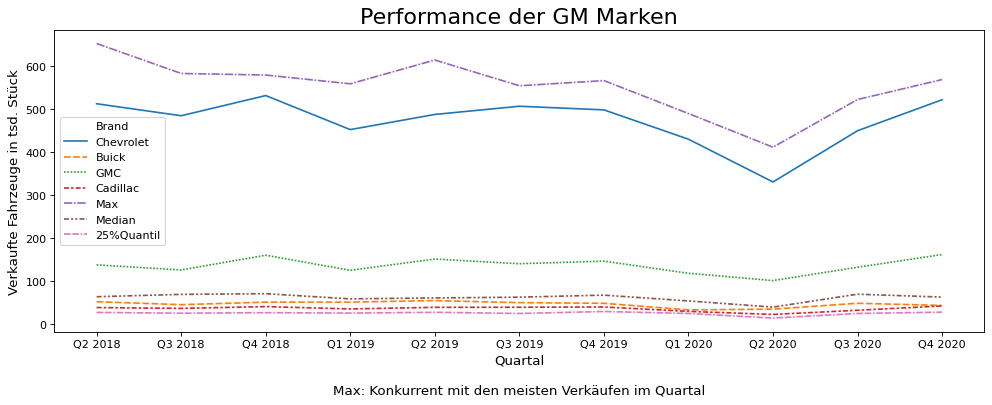

In [17]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=vk_relevant/1000)
plt.title('Performance der GM Marken', fontsize=20)
plt.xlabel("Quartal\n\nMax: Konkurrent mit den meisten Verkäufen im Quartal", fontsize=12)
plt.ylabel("Verkaufte Fahrzeuge in tsd. Stück", fontsize=12)

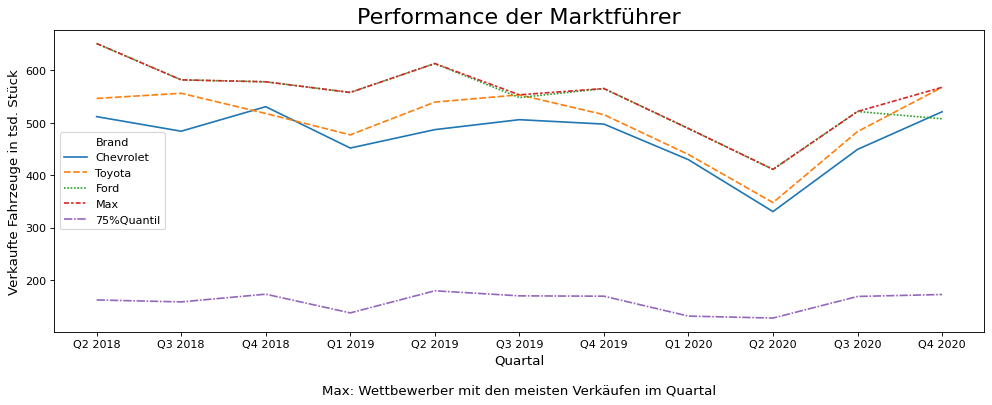

In [18]:
vk_max = df_verkaufszahlen[["Chevrolet","Toyota","Ford","Max","75%Quantil"]]
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=vk_max/1000)
plt.title('Performance der Marktführer', fontsize=20)
plt.xlabel("Quartal\n\nMax: Wettbewerber mit den meisten Verkäufen im Quartal", fontsize=12)
plt.ylabel("Verkaufte Fahrzeuge in tsd. Stück", fontsize=12)
plt.show()

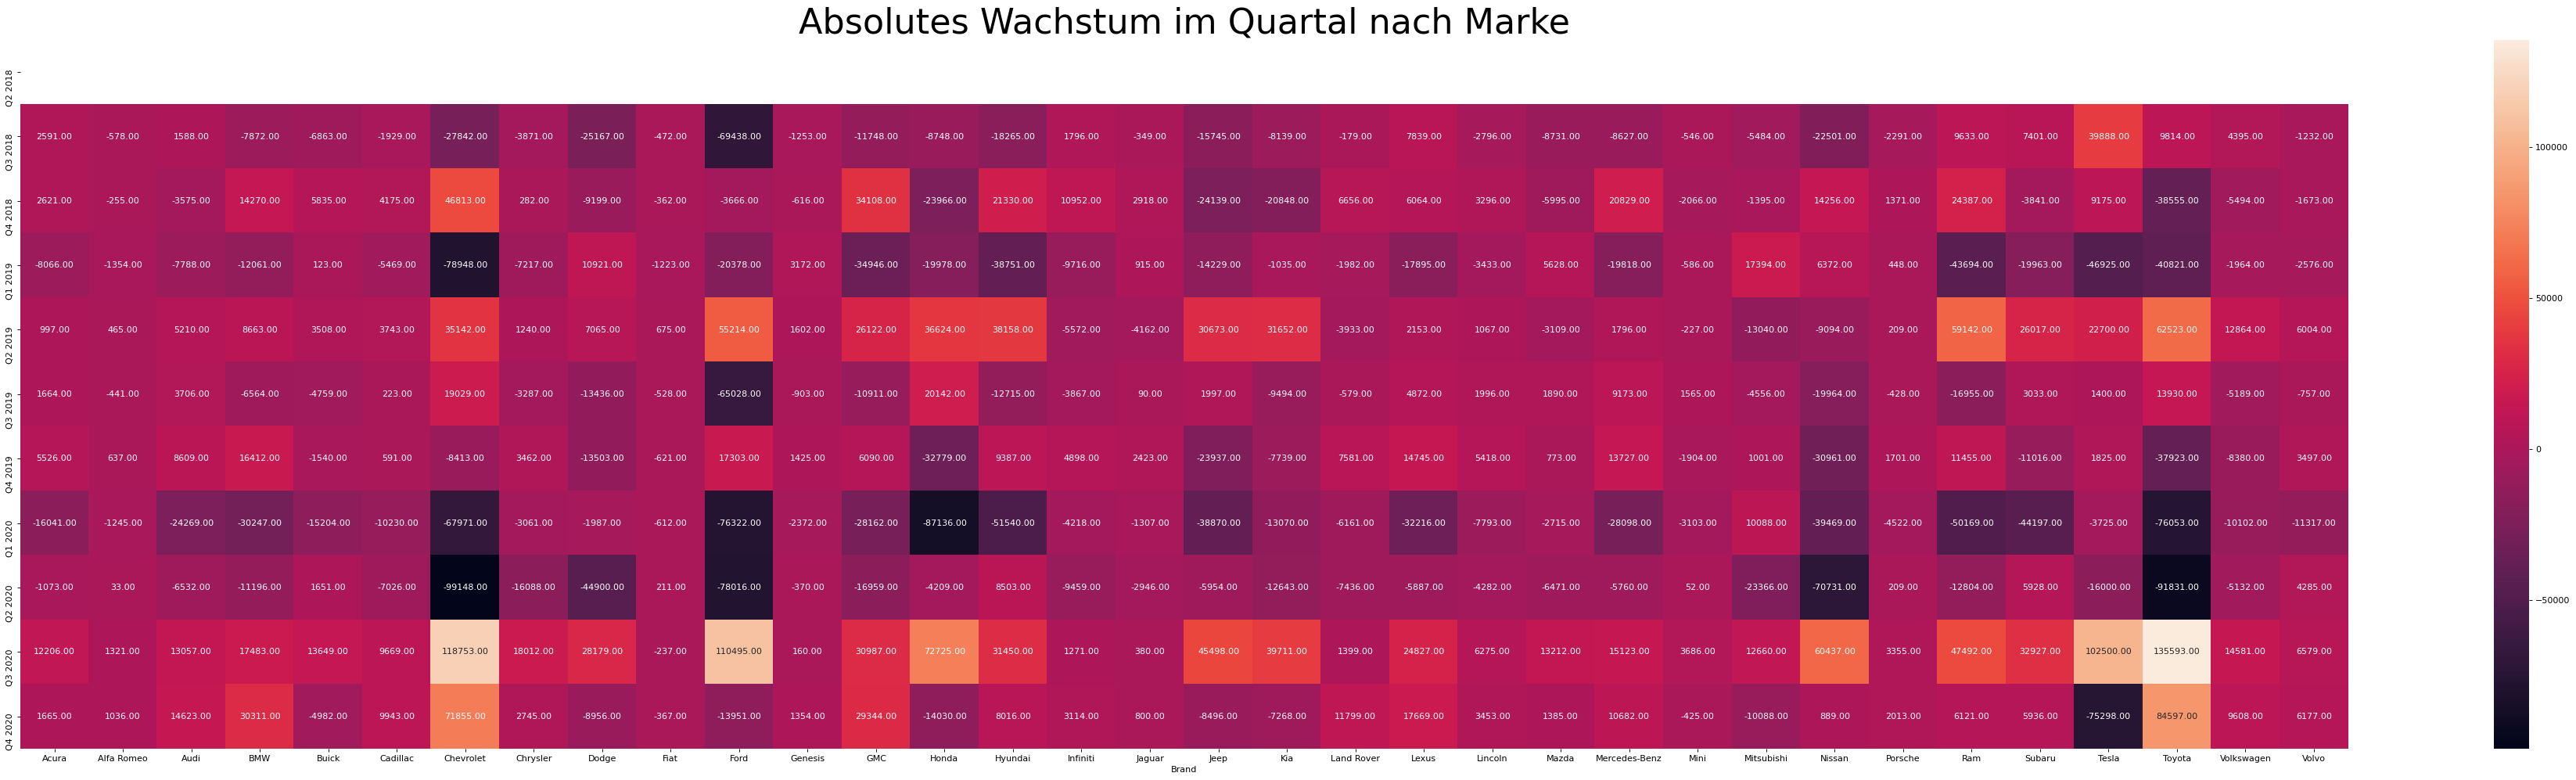

In [19]:
# VERÄNDERUNG VERKAUFSZAHLEN
df_delta_verkaufszahlen = df_verkaufszahlen.diff(periods=1,axis=0)
df_delta_verkaufszahlen["marktwachstum_absolut"] = df_verkaufszahlen["Summe"].diff(periods=1)
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_delta_verkaufszahlen.drop(["Summe","marktwachstum_absolut"]+meta_information,axis=1), annot=True, fmt=".2f")
plt.title('Absolutes Wachstum im Quartal nach Marke', fontsize=40)
plt.show()

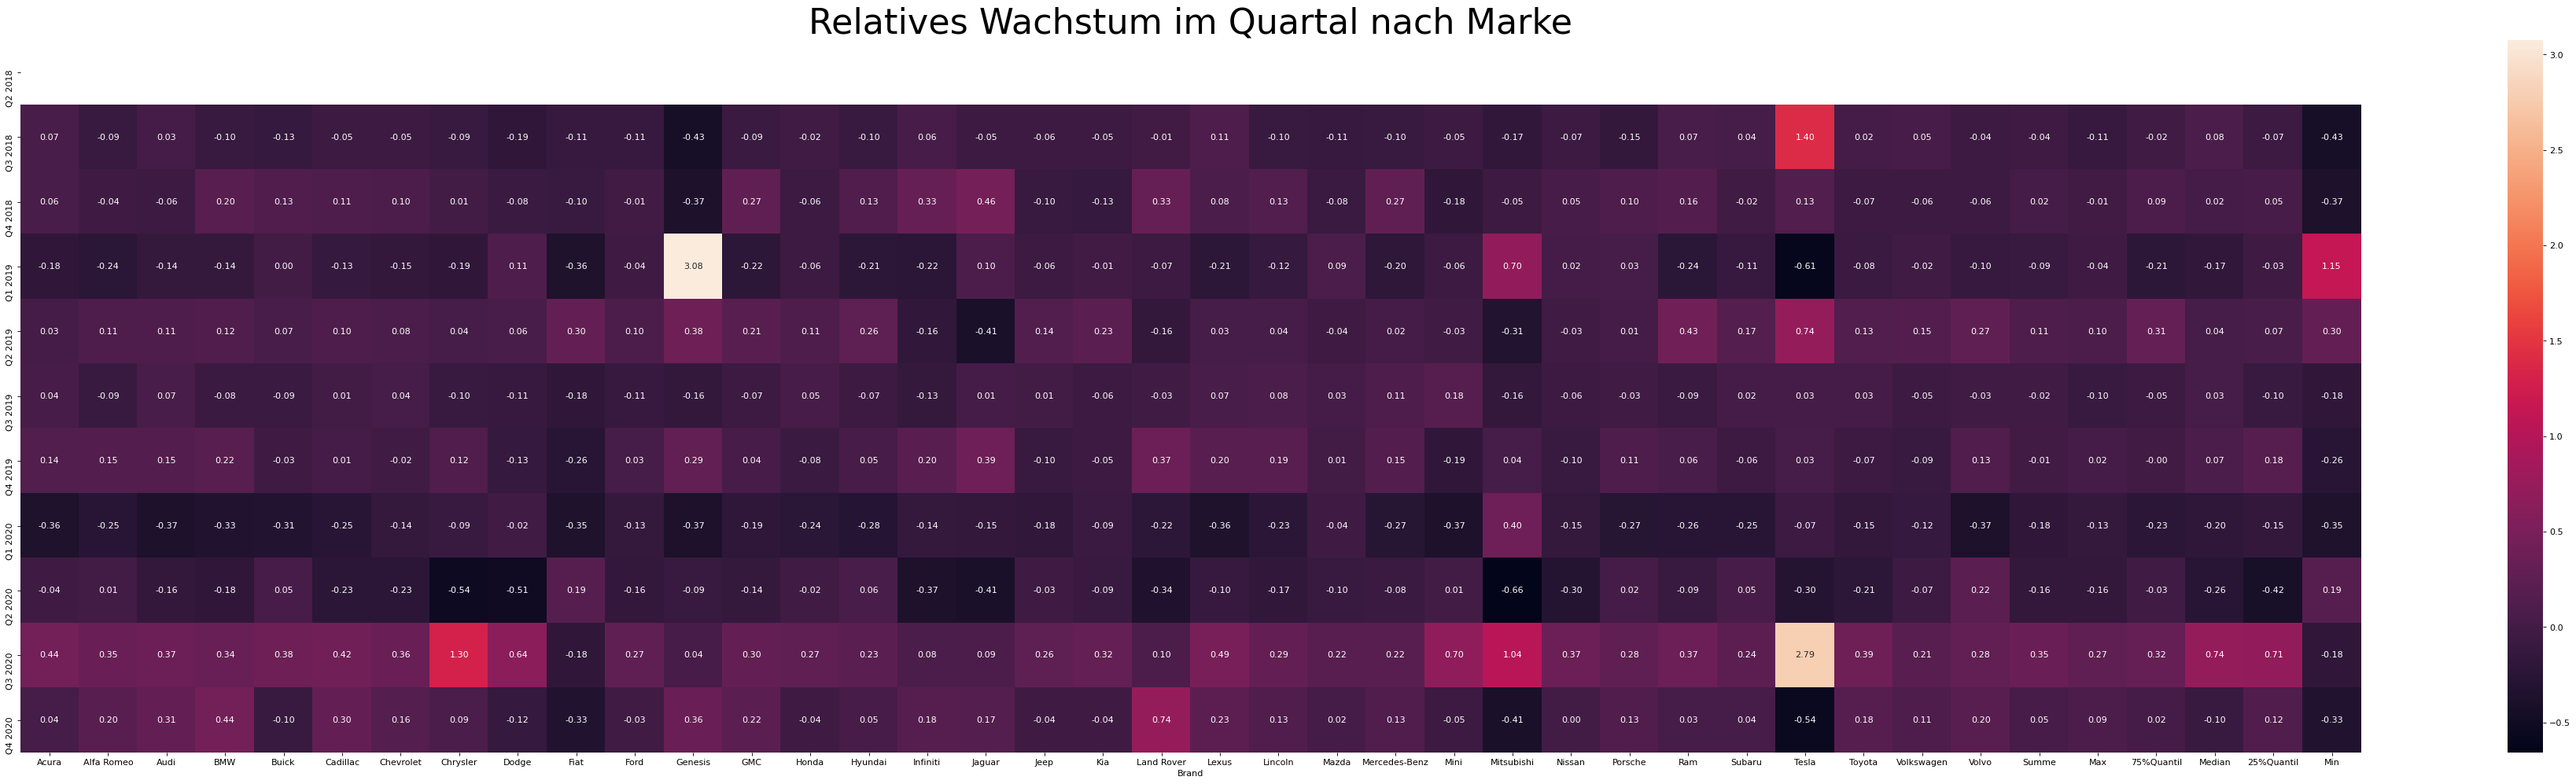

In [20]:
# Relatives Wachstum im verglich zum vorgehenden Quartak im Quartal nach Marke
df_rel_delta_verkaufszahlen = df_verkaufszahlen.pct_change()
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_rel_delta_verkaufszahlen, annot=True, fmt=".2f")
plt.title('Relatives Wachstum im Quartal nach Marke', fontsize=40)
plt.show()

## Marktanteile

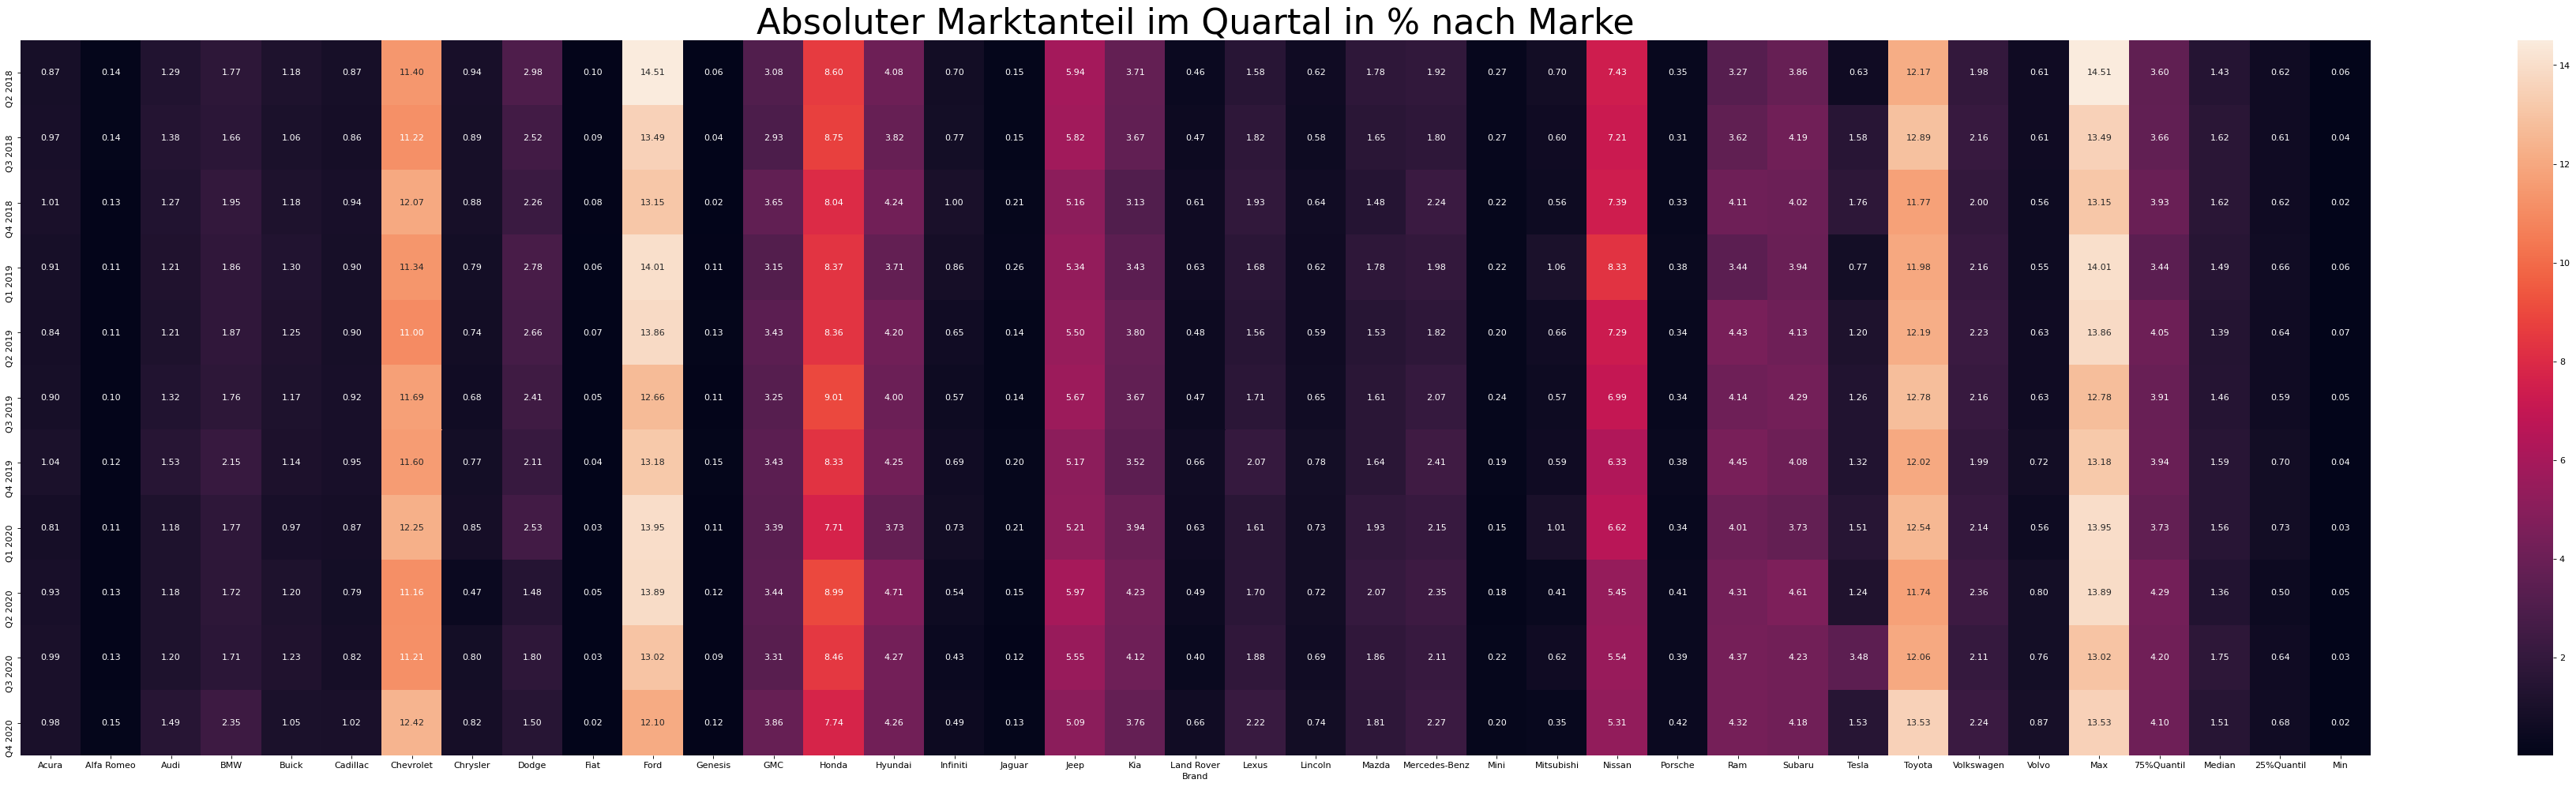

In [21]:
# MARKTANTEIL in %
df_market_share = df_verkaufszahlen.divide(df_verkaufszahlen["Summe"],axis=0).mul(100,axis=0)
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_market_share.drop(["Summe"],axis=1), annot=True, fmt=".2f")
plt.title('Absoluter Marktanteil im Quartal in % nach Marke', fontsize=40)
plt.show()

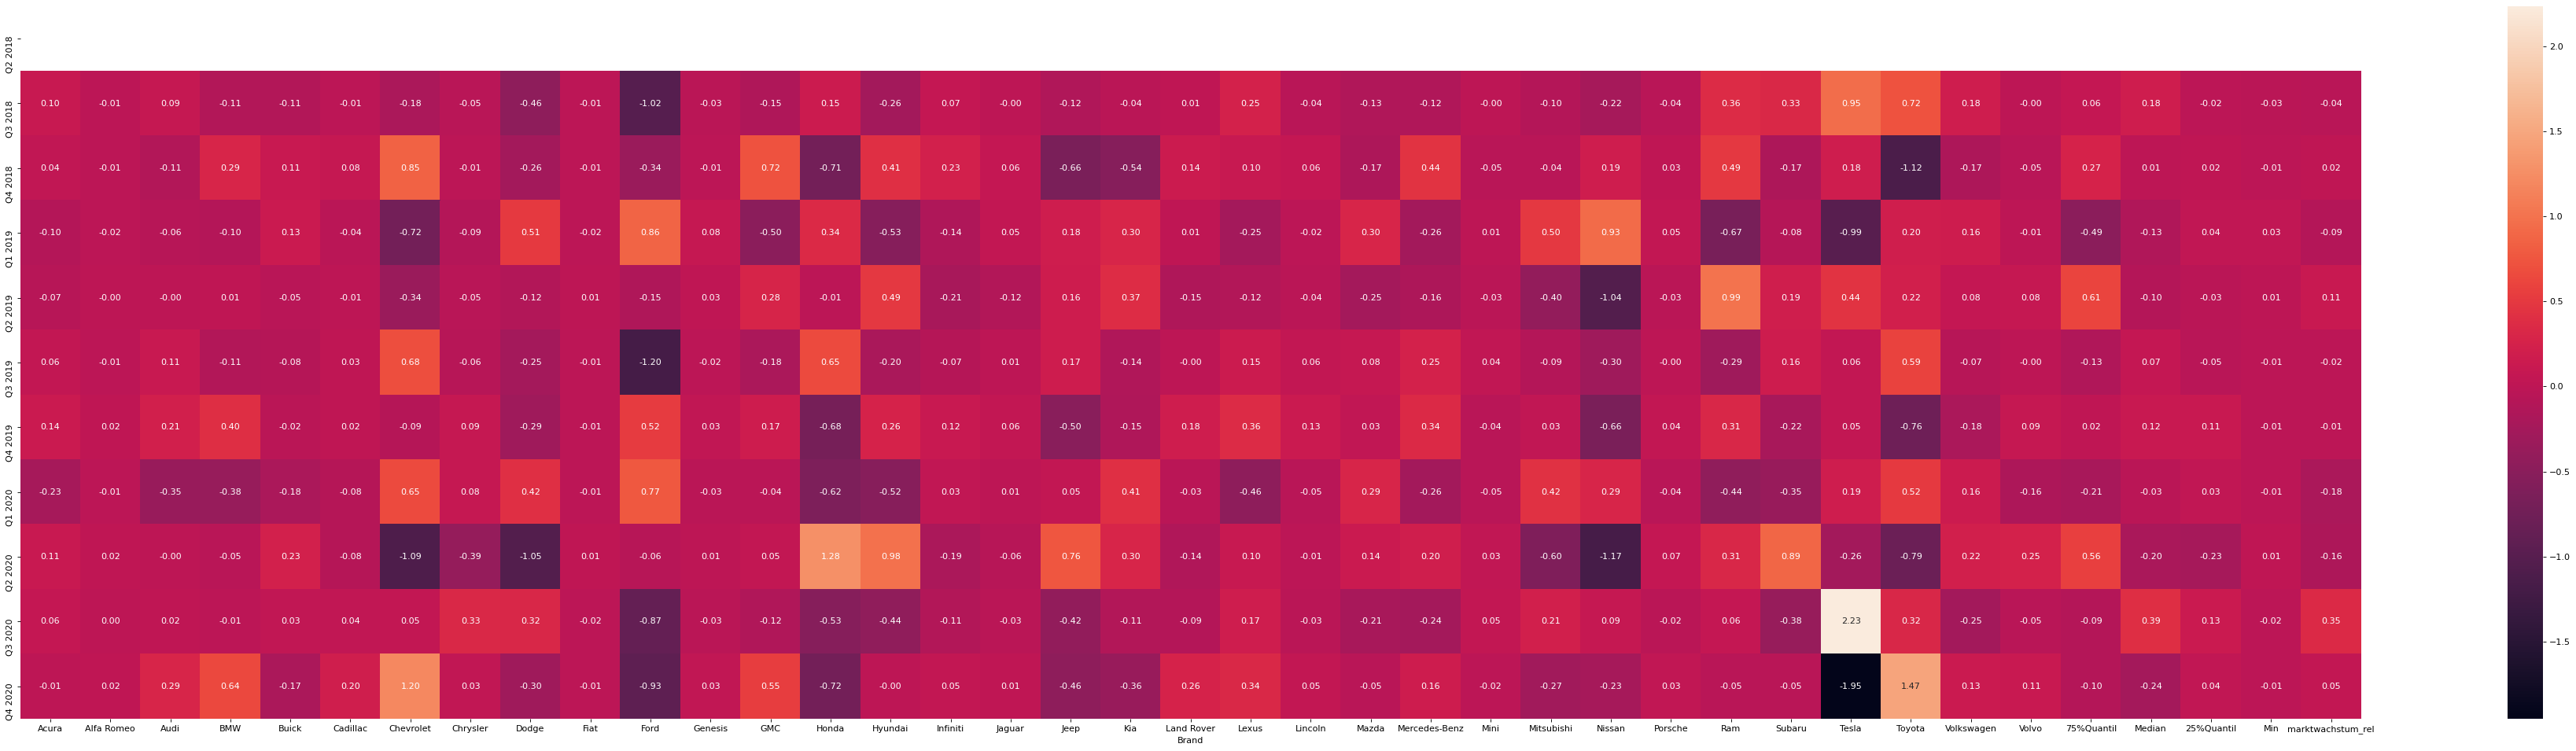

In [22]:
# VERÄNDERUNG RELATIVER MARKTANTEIL in %
df_delta_market_share = df_market_share.diff(periods=1,axis=0)
df_delta_market_share["marktwachstum_absolut"] = df_verkaufszahlen["Summe"].diff(periods=1)
df_delta_market_share["marktwachstum_rel"] = df_verkaufszahlen["Summe"].pct_change()
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_delta_market_share.drop(["Summe","marktwachstum_absolut"],axis=1).drop(["Max"],axis=1), annot=True, fmt=".2f")
plt.show()

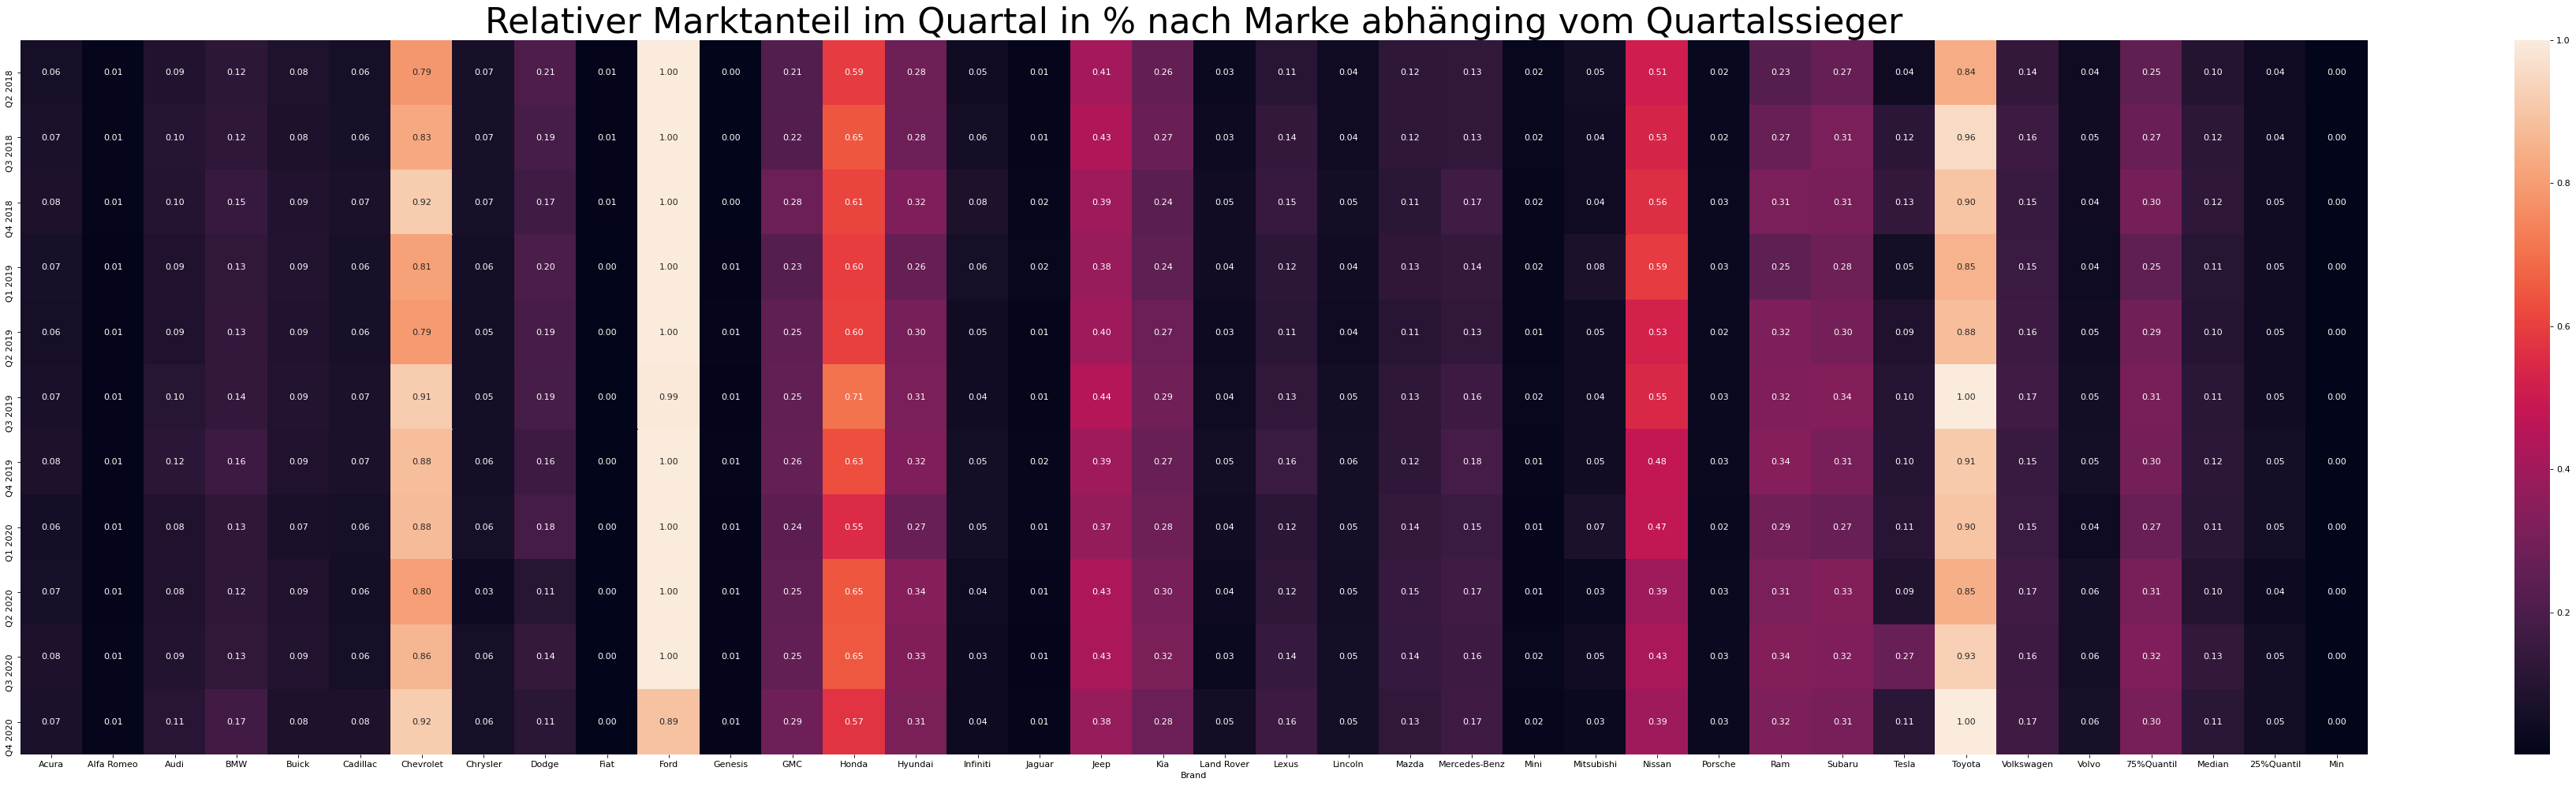

In [23]:
# RELATIVER MARKTANTEIL in %
df_rel_market_share = df_verkaufszahlen.divide(df_verkaufszahlen["Max"],axis=0)
figure(num=None, figsize=(60, 15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_rel_market_share.drop(["Summe"],axis=1).drop(["Max"],axis=1), annot=True, fmt=".2f")
plt.title('Relativer Marktanteil im Quartal in % nach Marke abhänging vom Quartalssieger', fontsize=40)
plt.show()

# BCG

In [24]:
def get_plot(data: pd.core.series.Series) -> pd.DataFrame:
    data_dict = {}
    for data_ in data.items():
        
        if data_[0][0] == "Summe" or data_[0][0] == "Max":
            continue
        if data_[0][0] not in data_dict:
            data_dict[data_[0][0]]={}
        data_dict[data_[0][0]][data_[0][1]]=data_[1]
    df_ = pd.DataFrame.from_dict(data_dict, orient="index")
    df_.reset_index(inplace=True)
    df_.rename(columns={"index":"Marke"},inplace=True)
    return df_   

In [25]:
df_wachstum_marktanteil = (pd.concat([df_rel_delta_verkaufszahlen, 
                df_rel_market_share], 
                axis=1, 
                keys=['wachstum','marktanteil_rel'])
        .swaplevel(0,1,axis=1)
        .sort_index(axis=1, ascending=[True, False])
        )

In [26]:
df_delta_verkaufszahlen["Summe"]["Q4 2020"]/df_verkaufszahlen["Summe"]["Q4 2020"]

0.04558187706090619

In [27]:
durchschnitt_marktent = df_delta_verkaufszahlen["Summe"]["Q4 2020"]/df_verkaufszahlen["Summe"]["Q4 2020"]

In [28]:
keys_2020 = [key for key in df_wachstum_marktanteil.index if "2020" in key]
data_2020 = df_wachstum_marktanteil.loc[keys_2020]
data_2020 = data_2020.sum(axis=0)/4
daten_wachstum_marktanteil = get_plot(data_2020)

In [29]:
relevante_unternehmen=daten_wachstum_marktanteil.loc[daten_wachstum_marktanteil["Marke"].isin(relevante_marken)]

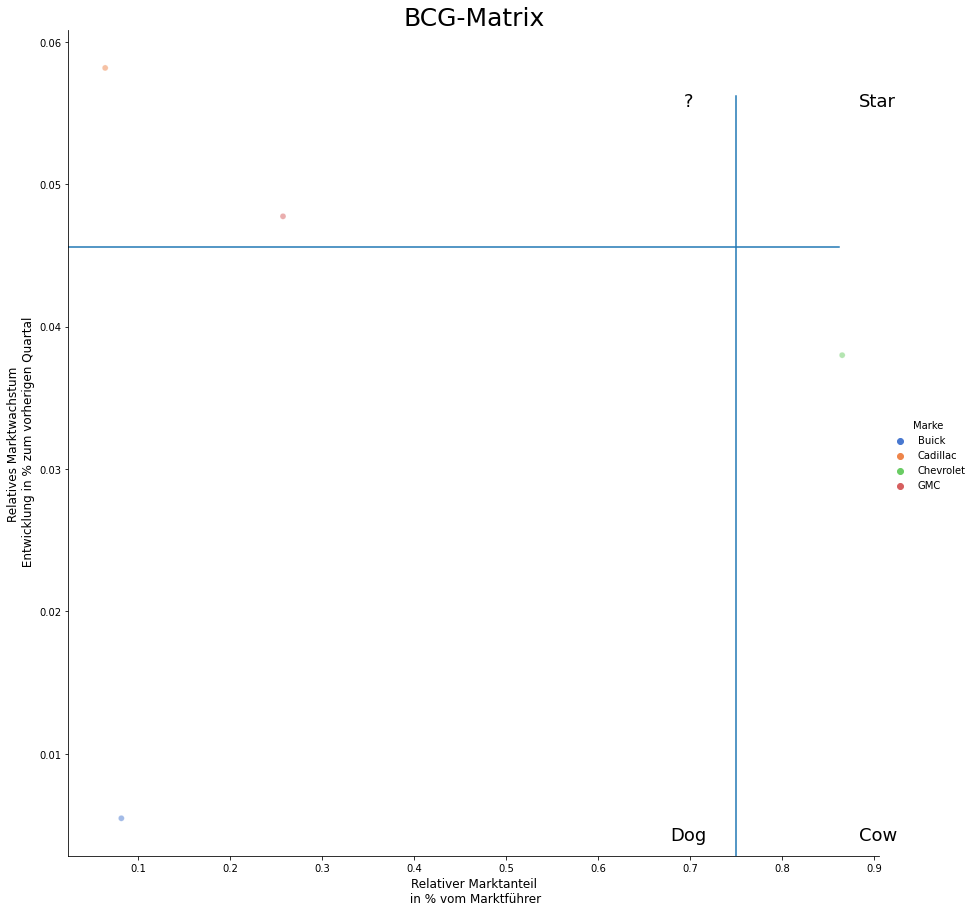

In [30]:
fig = sns.relplot(x="marktanteil_rel", y="wachstum", hue="Marke",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=12, data=relevante_unternehmen)
plt.xlabel("Relativer Marktanteil\n in % vom Marktführer", fontsize=12)
plt.ylabel("Relatives Marktwachstum\n Entwicklung in % zum vorherigen Quartal", fontsize=12)
plt.axvline(0.75, 0,0.92)
plt.axhline(durchschnitt_marktent,0,0.95)

plt.title('BCG-Matrix', fontsize=25,verticalalignment='top',)
#plt.figtext(.5,.95,f'Unternehmen mit min. {rel_marktanteil_grenzwert*100}% vom Marktanteil des Markführers', fontsize=18,verticalalignment='top',ha='center')
plt.figtext(.7,.9,'?', fontsize=18, ha='center')
plt.figtext(.9,.9,'Star', fontsize=18, ha='center')
plt.figtext(.7,.05,'Dog', fontsize=18, ha='center')
plt.figtext(.9,.05,'Cow', fontsize=18, ha='center')
plt.show()